In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

*觀察資料*

In [3]:
train = pd.read_csv('train.csv',index_col=False)
test = pd.read_csv('test.csv')
print('train.shape: ',train.shape)
print('test.shape: ',test.shape)
print(train.columns)
alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
alldata = alldata.reset_index(drop=True)

train.shape:  (1460, 81)
test.shape:  (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea

In [4]:
misscol = []
for col in alldata.columns:
    if alldata[col].isnull().sum()>0:
        misscol.append(col)
        print(col,":" ,alldata[col].isnull().sum())

MSZoning : 4
LotFrontage : 486
Alley : 2721
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 24
MasVnrArea : 23
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinSF1 : 1
BsmtFinType2 : 80
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
Electrical : 1
BsmtFullBath : 2
BsmtHalfBath : 2
KitchenQual : 1
Functional : 2
FireplaceQu : 1420
GarageType : 157
GarageYrBlt : 159
GarageFinish : 159
GarageCars : 1
GarageArea : 1
GarageQual : 159
GarageCond : 159
PoolQC : 2909
Fence : 2348
MiscFeature : 2814
SaleType : 1


In [5]:
alldata['Exterior1st'].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [6]:
alldata[alldata.GarageType.isnull()].loc[:,['GarageType','GarageYrBlt','GarageFinish','GarageQual']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
...,...,...,...,...
2893,NaN,NaN,NaN,NaN
2909,NaN,NaN,NaN,NaN
2913,NaN,NaN,NaN,NaN
2914,NaN,NaN,NaN,NaN


In [7]:
def fill_nan(data):
    data['LotFrontage'] = data['LotFrontage'].fillna(0)
    data['Alley'] = data['Alley'].fillna('missing')
    data['MasVnrType'] = data['MasVnrType'].fillna('None')
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    data['BsmtQual'] = data['BsmtQual'].fillna('TA')
    data['BsmtCond'] = data['BsmtCond'].fillna('TA')
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')
    data['Electrical'] = data['Electrical'].fillna('SBrkr')
    data['FireplaceQu'] = data['FireplaceQu'].fillna('missing')
    data['GarageType'] = data['GarageType'].fillna('Attchd')
    data = data.drop('GarageYrBlt', axis=1)
    data['GarageFinish'] = data['GarageFinish'].fillna('Unf')
    data['GarageQual'] = data['GarageQual'].fillna('TA')
    data['GarageCond'] = data['GarageCond'].fillna('TA')
    data['PoolQC'] = data['PoolQC'].fillna('missing')
    data['Fence'] = data['Fence'].fillna('missing')
    data['MiscFeature'] = data['MiscFeature'].fillna('missing')
    data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0]) # 針對數量極少的NaN，直接使用眾數來代替
    data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mode()[0])
    data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mode()[0])
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mode()[0])
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mode()[0])
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0])
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0])
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
    data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mode()[0])
    data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

    return data

In [8]:
alldata = fill_nan(alldata)
print('處理完後NaN數量:',alldata.isnull().any().sum())

處理完後NaN數量: 0


In [9]:
print(alldata.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [10]:
categorical = [col for col in alldata.columns if alldata[col].dtype == 'O']
for i in categorical:
    print(i,':',alldata[i].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : ['missing' 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTil

In [11]:
from sklearn.preprocessing import LabelEncoder
# 這裏有些使用map有些使用labelencoder的原因是因為將數值轉換為str後，順序會亂掉導致labelencoder轉換不正確
# 順序不正確的需要額外挑出來重新排序
alldata['MSSubClass'] = alldata['MSSubClass'].astype(str).map({'20':0,'30':1,'40':2,'45':3,'50':4,'60':5,'70':6,'75':7,'80':8,'85':9,'90':10,'120':11,'150':12,'160':13,'180':14,'190':15})
alldata['OverallQual'] = alldata['OverallQual'].astype(str).map({'1':0,'2':1,'3':2,'4':3,'5':4,'6':5,'7':6,'8':7,'9':8,'10':9})
alldata['MoSold'] = alldata['MoSold'].astype(str).map({'1':0,'2':1,'3':2,'4':3,'5':4,'6':5,'7':6,'8':7,'9':8,'10':9,'11':10,'12':11})
alldata['HouseStyle'] = alldata['HouseStyle'].map({'1Story':0,'1.5Unf':1,'1.5Fin':2,'2Story':3,'2.5Unf':4,'2.5Fin':5,'SFoyer':6,'SLvl':7})

qual_dict = {'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
alldata['ExterQual'] = alldata['ExterQual'].map(qual_dict)
alldata['ExterCond'] = alldata['ExterCond'].map(qual_dict)
alldata['BsmtQual'] = alldata['BsmtQual'].map(qual_dict)
alldata['BsmtCond'] = alldata['BsmtCond'].map(qual_dict)
alldata['HeatingQC'] = alldata['HeatingQC'].map(qual_dict)
alldata['KitchenQual'] = alldata['KitchenQual'].map(qual_dict)
alldata['FireplaceQu'] = alldata['FireplaceQu'].map(qual_dict)
alldata['GarageQual'] = alldata['GarageQual'].map(qual_dict)
alldata['GarageCond'] = alldata['GarageCond'].map(qual_dict)
alldata['PoolQC'] = alldata['PoolQC'].map(qual_dict)

alldata['BsmtExposure'] = alldata['BsmtExposure'].map({'No':0,'Mn':1,'Av':2,'Gd':3})
alldata['BsmtFinType1'] = alldata['BsmtFinType1'].map({'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})
alldata['BsmtFinType2'] = alldata['BsmtFinType2'].map({'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})
alldata['Functional'] = alldata['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
alldata['GarageFinish'] = alldata['GarageFinish'].map({'Unf':0,'RFn':1,'Fin':2})
alldata['Fence'] = alldata['Fence'].map({'missing':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})


alldata['OverallCond'] = alldata['OverallCond'].astype(str)
alldata['YearRemodAdd'] = alldata['YearRemodAdd'].astype(str)
cols = ['Street','Alley','LandSlope','Foundation','CentralAir','PavedDrive','OverallCond','YearRemodAdd']

for col in cols:
    lbender = LabelEncoder() 
    lbender.fit(list(alldata[col].values)) 
    alldata[col] = lbender.transform(list(alldata[col].values))

In [12]:
def numerical_proc(data):
    data['BsmtFinType'] = data['BsmtFinType1'] + data['BsmtFinType2']
    data['BsmtFinSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['Bath'] = data['BsmtFullBath'] + data['BsmtHalfBath'] + data['FullBath'] + data['HalfBath']
    data['Porch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    data['BuildingAge'] = data['YrSold'] - data['YearBuilt']
    return data

alldata = numerical_proc(alldata)

### 得到屋齡後，將`YrSold`及`YearBuilt`轉成`label encoder`

In [13]:
alldata['YrSold'] = alldata['YrSold'].astype(str)
alldata['YearBuilt'] = alldata['YearBuilt'].astype(str)
cols = ['YrSold','YearBuilt']
for col in cols:
    lbender = LabelEncoder() 
    lbender.fit(list(alldata[col].values)) 
    alldata[col] = lbender.transform(list(alldata[col].values))

### 現在我們大致完成了所有欄位的處理，接下來從訓練資料中的房價作為解釋變數下手，觀察每個特徵對房價的相關性，將分成連續型與離散型。

* 連續型數值：例如`GarageArea`車庫面積就是個連續型數值，我們期望看到當面積越大，房價也越高的情況。

* 離散型數值：例如`OverallQual`房屋材料與質量是以等級來區分，總共1~10級，我們期望看到當數值等級越高時，房價也越高的情況

---

### 針對連續型變數，適合使用散佈圖來觀察趨勢

從中發現，大部分的散佈圖當 $x$ 軸數值越來越大時，房價的確是越來越高，但是離群值也越來越多，當遇到這種情況時，我們考慮去除離群值以及使用對數轉換，減少離群值對整體資料的影響。

這裏需要另外注意，屋齡`BuildingAge`是負相關，這是因為屋齡越老房價越便宜，負相關對於迴歸預測也是有幫助的，這個欄位需要保留。

In [14]:
continuous = ['LotFrontage','LotArea','MasVnrArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','BsmtFinSF1','ScreenPorch','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','BsmtFinSF','2ndFlrSF','TotalSF','LowQualFinSF','GrLivArea','Porch','BuildingAge']

In [15]:
plotdd = alldata[:train.shape[0]]
plotdd['SalePrice'] = train.SalePrice

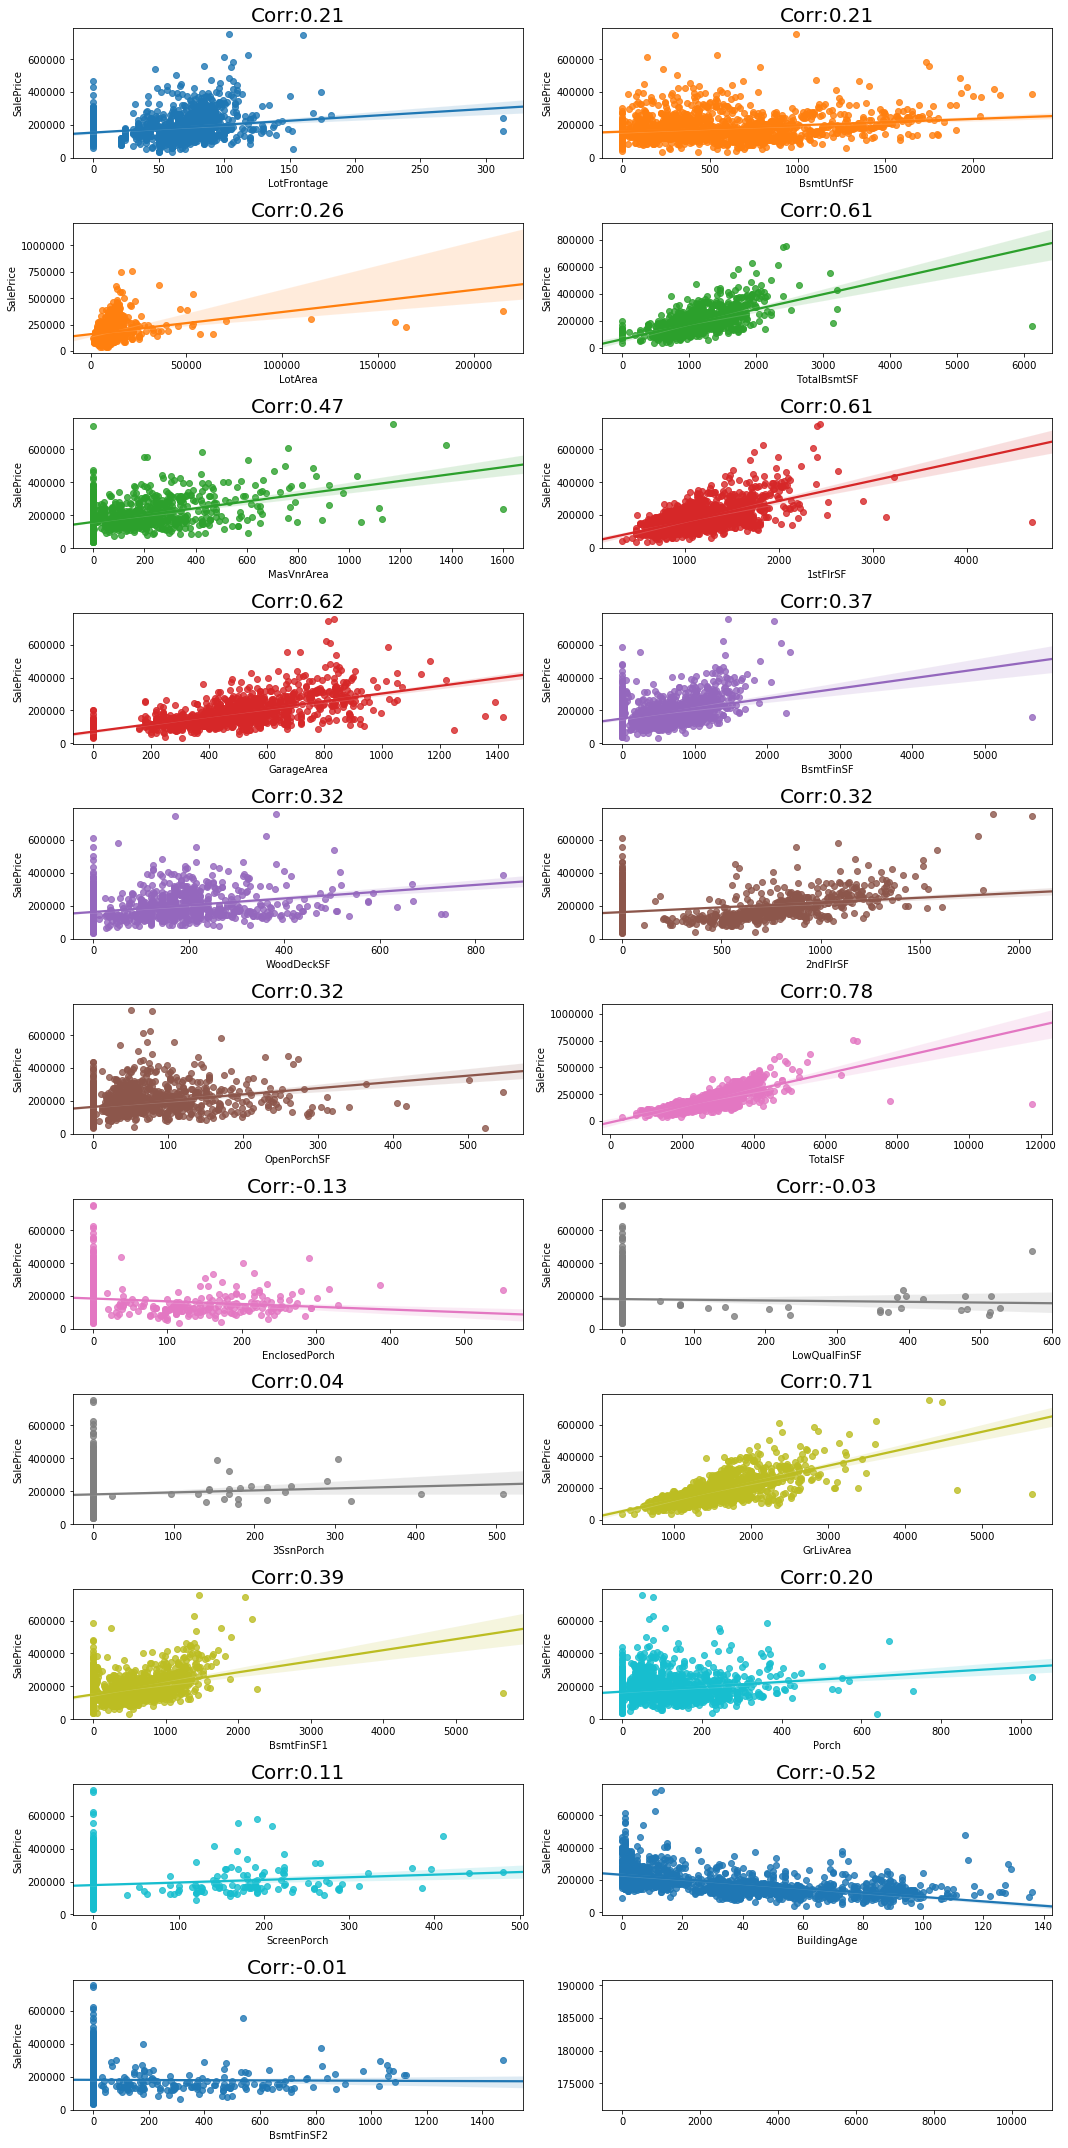

In [16]:
rcParams['figure.figsize'] = (15,30)
fig, axes = plt.subplots(11,2)
sns.set()
for i in range(len(continuous)):
    if i < 11:
        pp = sns.regplot(data=plotdd, x=continuous[i], y='SalePrice', ax=axes[i,0])
        pp.set_title('Corr:%.2f' % np.corrcoef(plotdd['SalePrice'],plotdd[continuous[i]])[0,1],size=20)
    else:
        pp2 = sns.regplot(data=plotdd, x=continuous[i], y='SalePrice', ax=axes[i-11,1])
        pp2.set_title('Corr:%.2f' % np.corrcoef(plotdd['SalePrice'],plotdd[continuous[i]])[0,1],size=20)
    plt.tight_layout()

### 接下來，考慮是否把離群值剔除。
### *離群值去除的動作, 可以先不執行。

In [17]:
y = train['SalePrice']

#alldata = alldata.drop(plotdd[(plotdd['TotalBsmtSF']>5000) & (plotdd['SalePrice']<300000)].index)
#alldata = alldata.drop(plotdd[(plotdd['1stFlrSF']>4000) & (plotdd['SalePrice']<300000)].index)
#alldata = alldata.drop(plotdd[(plotdd['BsmtFinSF']>5000) & (plotdd['SalePrice']<300000)].index)
#alldata = alldata.drop(plotdd[(plotdd['TotalSF']>10000) & (plotdd['SalePrice']<300000)].index)

# 這裏發現離群值其實都是同一筆，而GrLivArea的離群值多一筆
#alldata = alldata.drop(plotdd[(plotdd['GrLivArea']>4000) & (plotdd['SalePrice']<300000)].index)
#y = train['SalePrice'].drop(plotdd[(plotdd['GrLivArea']>4000) & (plotdd['SalePrice']<300000)].index)

#plotdd = plotdd.drop(plotdd[(plotdd['GrLivArea']>4000) & (plotdd['SalePrice']<300000)].index)

#alldata = alldata.drop(plotdd[(plotdd['BsmtFinSF1']>5000) & (plotdd['SalePrice']<300000)].index)

### 針對離散型變數，適合使用盒鬚圖

前面我們已經針對評級進行數值轉換，所以現在的`x軸`由左至右是具有大小優劣程度之分，例如`OverallQual`隨著評分越高，房價是跟著上升的，所以我們可以透過這樣的方式，來判斷哪些欄位是我們感興趣的。


* `PavedDrive,Functional,CentralAir,BsmtExposure,Alley,GarageFinish,
BsmtFinType2,FullBath,OverallCond,BsmtCond,BsmtFinType,Fireplaces,YearBuilt`

以上欄位是透過以下盒鬚圖篩選而來的，其中，`LandSlope`表示房屋位置的土地坡度傾斜程度，盒鬚圖表示當坡度越平緩，房價會越便宜，雖然這違反直覺，但是我相信這是有可能的，因為波士頓地理位置靠海，地形起伏不大，而坡度傾斜程度高的地方可能是山丘、高地，數量相對稀少，物以稀為貴，能夠有一個地方可以眺望大海是非常稀少的，所以我認為資料這樣表示是合理的。

In [18]:
discrete1 = ['LandSlope','YearBuilt','PavedDrive','Functional','CentralAir','BsmtExposure','Alley','GarageFinish','BsmtFinType2','FullBath','OverallCond','BsmtCond','BsmtFinType','Fireplaces']

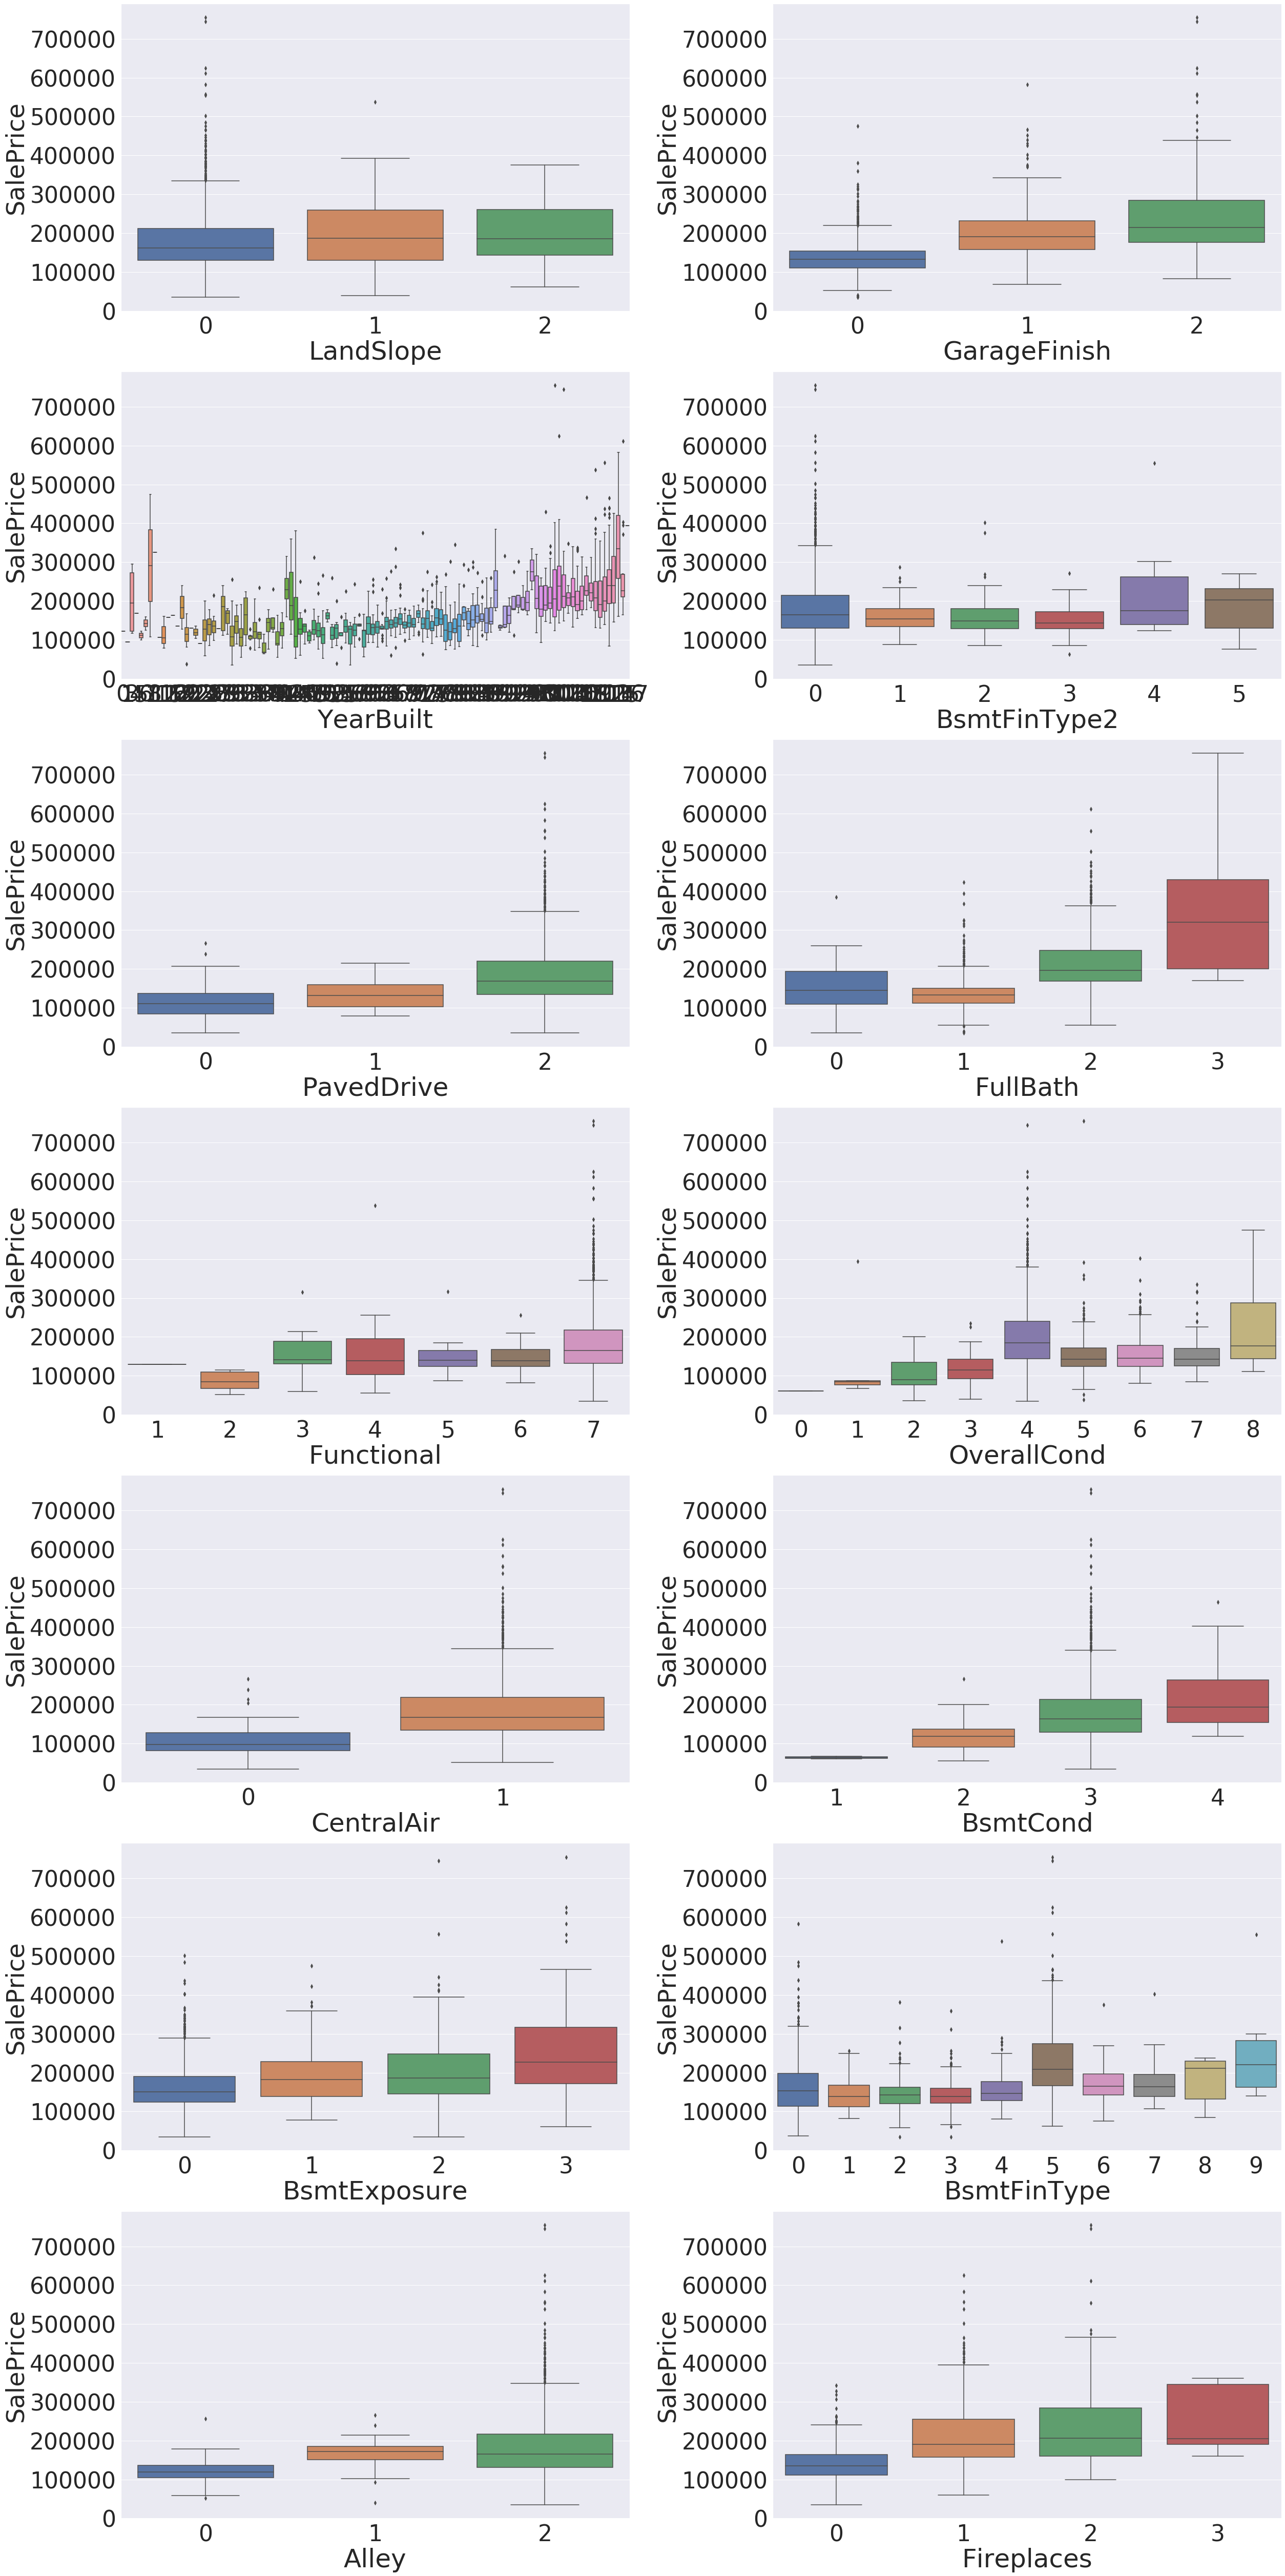

In [33]:
sns.set(font_scale=4)
rcParams['figure.figsize'] = (35,70)
fig, axes = plt.subplots(7,2)
sns.set(color_codes=True)
for i in range(len(discrete1)):
    if i < 7:
        pp = sns.boxplot(data=plotdd, x=discrete1[i], y='SalePrice', ax=axes[i,0])
        pp.set_xlabel(discrete1[i],fontsize=50)
    else:
        pp2 = sns.boxplot(data=plotdd, x=discrete1[i], y='SalePrice', ax=axes[i-7,1])
        pp2.set_xlabel(discrete1[i],fontsize=50)
    plt.tight_layout()

#### 接下來討論其餘欄位

`Street,GarageCond,BsmtFinType1,GarageCars,ExterQual,TotRmsAbvGrd,OverallQual,BsmtQual`
`KitchenQual,Bath,FireplaceQu,GarageQual,BsmtFullBath,HeatingQC`

以上欄位是我覺得當評價變動時，房價確實有上升的欄位，其中像是`GarageCond`,`BsmtFinType1,GarageCars,Bath`上升到一定程度後房價就持平的欄位，我想可能是某些買家對於這些欄位到達一定程度後對於價格的敏感程度就飽和了，也就是再多我也沒興趣的意思。

In [34]:
discrete2 = ['Street','GarageCond','BsmtFinType1','GarageCars','ExterQual','TotRmsAbvGrd','OverallQual','BsmtQual','KitchenQual','Bath','FireplaceQu','GarageQual','BsmtFullBath','HeatingQC']

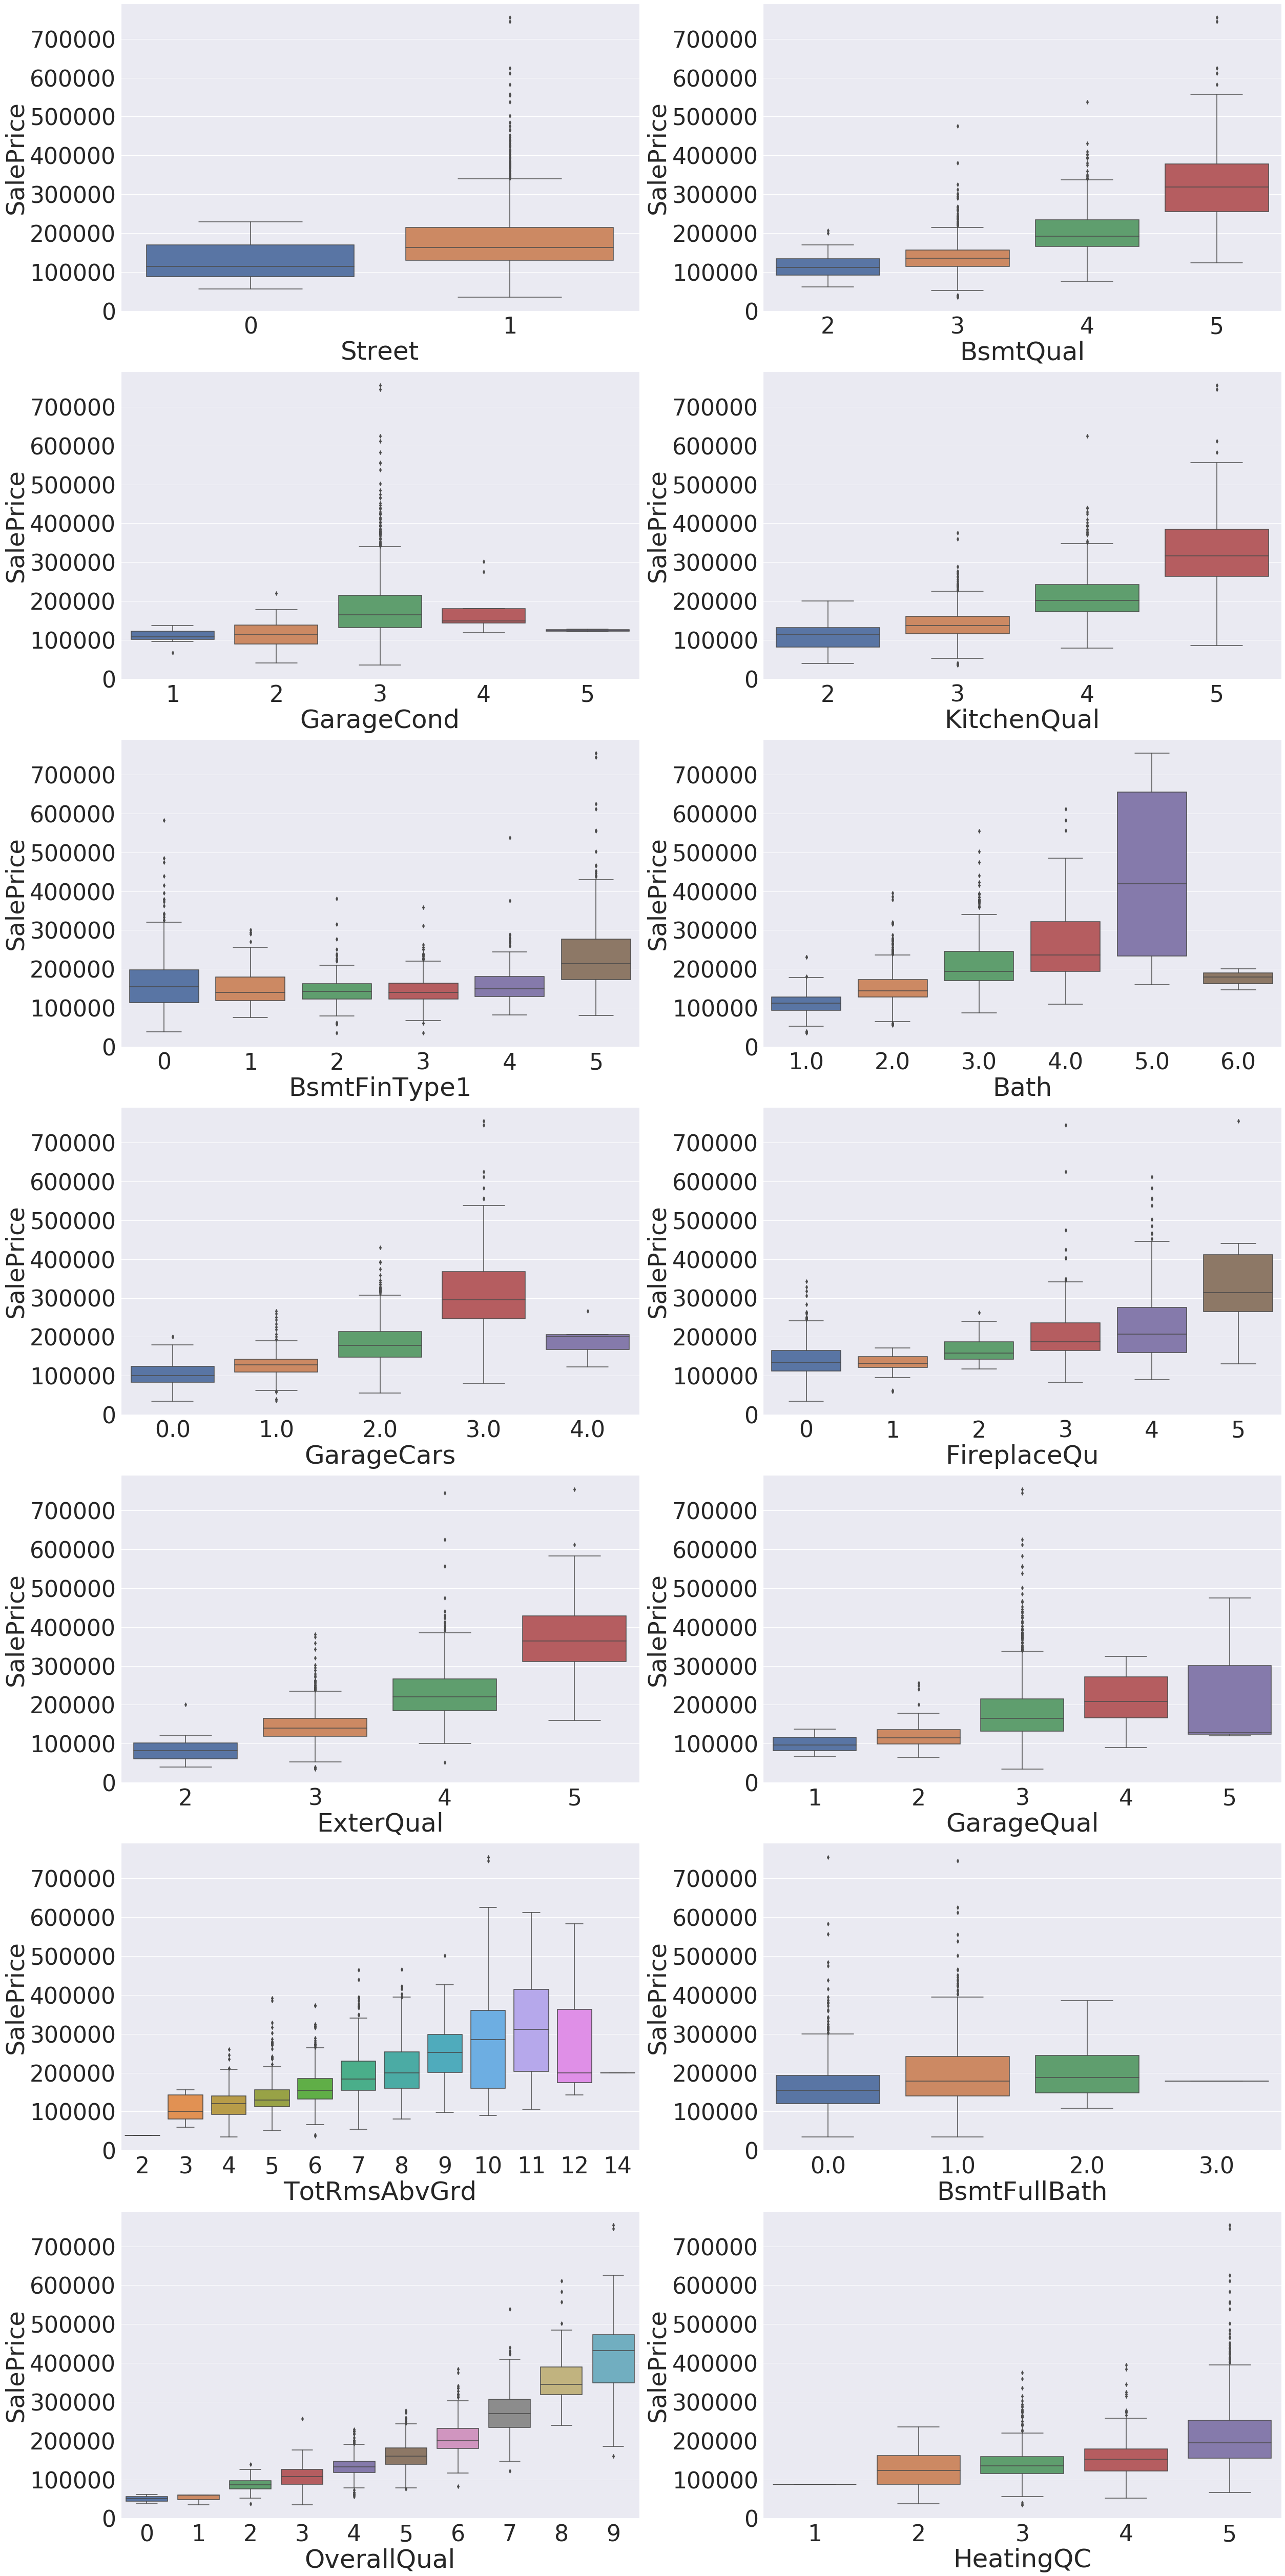

In [35]:
sns.set(font_scale=4)
rcParams['figure.figsize'] = (35,70)
fig, axes = plt.subplots(7,2)
sns.set(color_codes=True)
for i in range(len(discrete2)):
    if i < 7:
        pp = sns.boxplot(data=plotdd, x=discrete2[i], y='SalePrice', ax=axes[i,0])
        pp.set_xlabel(discrete2[i],fontsize=50)
    else:
        pp2 = sns.boxplot(data=plotdd, x=discrete2[i], y='SalePrice', ax=axes[i-7,1])
        pp2.set_xlabel(discrete2[i],fontsize=50)
    plt.tight_layout()

In [36]:
# unuse = ['BsmtHalfBath','GarageQual','KitchenAbvGr','HalfBath','Exterior2nd','BsmtFinType1','Condition1','MSZoning',
#          'Neighborhood','RoofMatl','Fence','Exterior1st','YrSold','Utilities','Heating','YearBuilt','MSSubClass','Condition2',
#          'PoolArea','BldgType','ExterCond','PoolQC','YearRemodAdd','MiscVal','MoSold','BsmtFinType']
# alldata = alldata.drop(unuse, axis=1)

## 接下來，我們要對數值做對數轉換

### 為何要進行對數轉換？

對數轉換的目的是為了減少數值差距過大及離群值而帶來的影響，從`絕對差異`轉變為`相對差異`，使得因變量的方差(離散程度)穩定。

1. 其中一個原因是為了閱讀上的方便，社會統計數據例如`家庭平均年收`,`國民人均所得`等等，通常都是屬於`右偏分佈`的資料，因為有錢人屬於少數，肯定會把整體的平均拉高，而且動輒幾億的身價會將`x軸`拉得非常非常的長，取對數之後，這種幾億的`絕對差異`，就會變成級距的`相對差異`，例如將 $10^9$取$\log_{10}$就是$9$，差距瞬間就減少，但是要注意的是，取對數後的資料單位就不具意義了。

2. 還有一個原因是配合統計需求，下圖是`GrLiveArea`與`SalePrice`散佈圖與密度圖，從左圖看來兩者有呈現一點指數遞增的關係，`相關係數`為$0.73$，兩者的資料分佈皆呈現`右偏分佈`，而迴歸模型的基本假設是資料為`線性關係`，顯然這種分佈不適合迴歸模型，所以這裏就需要用到`對數轉換`，右圖是經過`對數轉換`的結果，我們發現經過`對數轉換`後，`相關係數`有提升，而且從`非線性`轉為`線性`。

### 對數轉換實例 (非線性$\rightarrow$線性)

$$
\begin{aligned}
&Nonlinear: y = ab^x \\
Linear:\;&\log y = \log a + x\log b
\end{aligned}
$$

In [37]:
from scipy.stats import zscore
example = plotdd.copy()
example['SalePrice_log'] = np.log1p(example['SalePrice'])
example['GrLivArea_log'] = np.log1p(example['GrLivArea'])

sns.set()
import matplotlib.gridspec as gridspec
import SeabornFig2Grid as sfg
pp = sns.jointplot(x='GrLivArea',y='SalePrice',data=example,kind='reg')
pp2 = sns.jointplot(x='GrLivArea_log',y='SalePrice_log',data=example,kind='reg')

fig = plt.figure(figsize=(11,6))
gs = gridspec.GridSpec(1,2)

sfg.SeabornFig2Grid(pp, fig, gs[0])
sfg.SeabornFig2Grid(pp2, fig, gs[1])
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'SeabornFig2Grid'

#### 接下來，我們透過`偏態係數`，來檢驗資料分佈是否屬於`偏態分佈`，此指標能夠確認資料分佈是否對稱。
$$
SK = \frac{3(\bar{X}-X_{med})}{\sigma}
$$
其中，$\bar{X}$為平均數，$X_med$為中位數，$\sigma$為標準差。

$SK>0$表示右偏(正偏)，$SK<0$表示左偏(負偏)。

In [38]:
numerical_alldata = [col for col in alldata.columns if alldata[col].dtype != 'O']

In [39]:
from scipy.stats import skew
skew_indx = alldata.skew(axis=0).sort_values(ascending=False)
print(skew_indx.head(10))

MiscVal          21.958480
PoolQC           18.418603
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
LandSlope         4.977715
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
dtype: float64


偏態係數沒有一個絕對範圍，大於`0.5`時我們就可以稱分佈過於`右偏`，反之，小於`-0.5`就是`左偏`。

In [40]:
skew_indx = skew_indx[abs(skew_indx) > 0.75]
skew_indx = skew_indx.index
alldata[skew_indx] = np.log1p(alldata[skew_indx])  #還原: alldata[skew_indx].apply(np.expm1)

### 剩下欄位屬於名目資料，使用`One-hot encoding`表示

In [41]:
alldata = pd.get_dummies(alldata)

####  (若沒有去除資料筆數, 則train data為 1460筆) 因為在train data上去除了2個離群值，所以剩餘1458筆

In [42]:
preproced_record_number = 1460
X_train = alldata[:preproced_record_number]
X_test = alldata[preproced_record_number:]
y_train = y
y_train = np.log1p(y_train) # 將預測值SalePrice取對數，讓特徵與預測值相關性提高

In [43]:
print('X_train.shape: ',X_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_train.shape: ',y_train.shape)

X_train.shape:  (1460, 217)
X_test.shape:  (1459, 217)
y_train.shape:  (1460,)


分析

In [44]:
highly_correlated_columns = [
'BsmtFinSF2', 'PoolQC', 'BsmtFinType', 'BsmtFinSF', 'Exterior2nd_CBlock',
'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'MiscFeature_Shed', 'SaleCondition_Partial'
]

In [45]:
#移除高相關的欄位
X_train.drop(highly_correlated_columns, axis=1, inplace=True)
X_test.drop(highly_correlated_columns, axis=1, inplace=True)

In [46]:
X_train.shape, X_test.shape

((1460, 207), (1459, 207))

In [47]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,5,65.0,9.042040,0.693147,1.098612,0.0,1.386294,6,4,110,...,0,0,0,0,1,0,0,0,0,1
1,0,80.0,9.169623,0.693147,1.098612,0.0,0.000000,5,7,83,...,0,0,0,0,1,0,0,0,0,1
2,5,68.0,9.328212,0.693147,1.098612,0.0,1.386294,6,4,108,...,0,0,0,0,1,0,0,0,0,1
3,6,60.0,9.164401,0.693147,1.098612,0.0,1.386294,6,4,25,...,0,0,0,0,1,1,0,0,0,0
4,5,84.0,9.565284,0.693147,1.098612,0.0,1.386294,7,4,107,...,0,0,0,0,1,0,0,0,0,1


# 0. Function definition

In [48]:
from sklearn.model_selection import train_test_split

X_train_splt, X_train_vld, Y_train_splt, Y_train_vld = train_test_split(X_train, y_train, test_size = 0.25, random_state = 86) 


In [57]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


models = ['LR', 'KNN', 'SVR', 'DT', 'RF', 'XGB']
result = pd.DataFrame()

#for loop for choose model
for m in models:
    if m == 'LR':
        model =  LinearRegression()
    elif m == 'KNN':
         model = KNeighborsRegressor()
    elif m == 'SVR':
         model = SVR()
    elif m == 'DT':
         model = DecisionTreeRegressor()
    elif m == 'RF':
         model = RandomForestRegressor()
    elif m == 'XGB':
         model = XGBRegressor()
        
    #fit training data
    model.fit(X_train_splt, Y_train_splt)

    #make prediction
    predicted_splt = model.predict(X_train_splt)
    predicted_vld =  model.predict(X_train_vld)
    
    #run the rmse
    rmse_splt = round(sqrt(mean_squared_error(Y_train_splt, predicted_splt)),5)
    rmse_pred = round(sqrt(mean_squared_error(Y_train_vld, predicted_vld)),5)
    
    
    #store my result to the "result"空的dataframe，記得給他們名字
    row = pd.Series({
        'Training RMSE' : rmse_splt,
        'Validation RMSE' : rmse_pred
    }, name = m)
    
    #把每個row的拼起來
    result = result.append(row)

[14:04:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
result

,Training RMSE,Validation RMSE
LR,0.09267,0.13057
KNN,0.20120,0.26271
SVR,0.09189,0.32818
DT,0.00003,0.22828
RF,0.06201,0.14178
XGB,0.08066,0.12859


In [56]:
#df = pd.DataFrame(cars, columns= ['Brand', 'Price'])

result.to_csv ('export_result.csv', index = True, header=True)
